# Assignment 5
# Sona Thapa
# C0909929

#1 Understanding Sentiment Analysis and RNNs
####1What is Sentiment Analysis and its applications?
#### As a branch of natural language processing (NLP), sentiment analysis looks at and classifies the feelings that are expressed in text. Its main goal is to evaluate the emotional tone or mood that a text expresses, including whether it is neutral, negative, or positive. This method is frequently used to measure sentiments, opinions, and attitudes in a variety of settings, including market research, social media post analysis, brand impression management, and customer feedback evaluation. Businesses and researchers can learn a great deal about public opinion and consumer experiences by automating sentiment analysis.
**Key applications include:**
-**Social Media Monitoring:** examining opinions expressed on social media sites to gauge public opinion about events, goods, or businesses. This procedure aids in real-time comprehension of public sentiment and responses, allowing companies to remain abreast of consumer trends and views.
-**Market Analysis:**Analyzing consumer evaluations and comments to determine areas in need of improvement and to determine satisfaction levels. Businesses may improve the quality of their services and resolve any problems that affect the client experience with the aid of this analysis.
- **Market Analysis:**Strategy and market trend prediction can both benefit from an understanding of consumer mood.
- **Political Campaigns:** Assessing public opinion on political issues or candidates in order to comprehend the choices and viewpoints of voters. In addition to tracking changes in public opinion, this study can shed light on political trends and the efficacy of campaigns.
#### How RNNs Differ from Traditional Feedforward Neural Networks?
Recurrent Neural Networks (RNNs) are neural networks built to process sequential data by retaining information through feedback loops, making them ideal for tasks like time series analysis or language processing.
**Key Differences:*
- **Memory:**RNNs can retain memory by utilizing their hidden layers, enabling them to process and understand sequences of data by keeping track of previous information.
- **Sequential Input:** In RNNs, data is processed step by step in a sequence, with each output being looped back into the network to influence the input for the following step.
- **Parameter Sharing:**RNNs use the same set of weights at each time step, which makes them efficient for handling sequences of different lengths, as they don’t need separate parameters for each step.
#### The concept of hidden states and how information is passed through time steps in RNNs.
In RNNs, the hidden state serves as the network’s memory, retaining information about previous inputs. At each time step, the RNN updates its hidden state by combining the current input (like a word in a sentence) with the previous hidden state. This allows the network to pass information from one time step to the next, enabling it to capture patterns over time.
**Information Flow:**
- **Initial State:** Typically starts as zero or random small values.

- **Update Loop:** For each input in the sequence, the hidden state is updated using a function that combines the new input and the previous hidden state.

- **Output:** At each step or at the final step, an output is generated based on the hidden state.

RNNs compute a hidden state at each time step, capturing context from previous inputs:
\[h_t = f(W \cdot x_t + U \cdot h_{t-1} + b)
\]
Where:
- \(h_t\): Hidden state at time \(t\).
- \(x_t\): Input at time \(t\).
- \(W, U, b\): Trainable parameters.
#### Common Issues with RNNs: Vanishing and Exploding Gradients
RNNs are prone to challenges such as vanishing and exploding gradients, primarily due to their sequential nature and dependency on past information.
- **Vanishing Gradients:**his issue arises when gradients, which are used in backpropagation during training, become exceedingly small, making it difficult for the model’s weights to update. As a result, the training process is stalled. It commonly occurs with long sequences, where the impact of earlier inputs fades exponentially over time.
-**Exploding Gradients:**This happens when gradients increase rapidly during backpropagation, leading to excessively large updates to the model's weights. As a result, the model can diverge, making training unstable and unreliable.

**Solutions:**
- **Gradient Clipping:**Limits the gradients during backpropagation to stop them from becoming too large and causing instability, effectively preventing gradient explosion.
- **Use of Gated Units:**Models like LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Units) address these problems by using gates that control the flow of information, helping to prevent issues like vanishing and exploding gradients.

# 2. Dataset Preparation

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Define constants
max_words = 10000  # Keep only the top 10,000 most frequent words
maxlen = 500       # Maximum length of sequences (reviews)

# Step 1: Load the IMDB dataset
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

print(f"Number of training samples: {len(x_train)}")
print(f"Number of testing samples: {len(x_test)}")

# Step 2: Pad the sequences to ensure uniform input length
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

print(f"Shape of x_train: {x_train.shape}")
print(f"Shape of x_test: {x_test.shape}")

# Display an example
print(f"Example padded review: {x_train[0]}")
print(f"Label for the review: {y_train[0]} (1 = Positive, 0 = Negative)")

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 25000
Number of testing samples: 25000
Shape of x_train: (25000, 500)
Shape of x_test: (25000, 500)
Example padded review: [   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4  

# 3. Building the RNN Model

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
import numpy as np

# Define constants
vocab_size = 10000  # Vocabulary size (matches dataset preparation)
embedding_dim = 128  # Dimension of embedding space
max_length = 500  # Sequence length (matches padding length)

# Build the model
model = Sequential([
    # Input and Embedding layer
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),

    # RNN layer (LSTM or GRU for better performance)
    LSTM(units=128, return_sequences=False),  # Change to GRU if preferred

    # Fully connected layer
    Dense(64, activation='relu'),
    Dropout(0.5),

    # Output layer
    Dense(1, activation='sigmoid')  # Binary classification (positive or negative)
])

# Build the model dynamically by passing a sample input
sample_input = np.zeros((1, max_length))  # A single input sample with padding
model(sample_input)  # Call the model on sample input to initialize weights
# Print model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (1, 500, 128)               │       1,280,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (1, 128)                    │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (1, 64)                     │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (1, 64)                     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (1, 1)                      │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

# 4. Training the Model

In [3]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Compile the model
model.compile(
    optimizer='adam',  # Adam optimizer
    loss='binary_crossentropy',  # Binary cross-entropy for binary classification
    metrics=['accuracy']  # Accuracy metric
)

# Split the dataset into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(
    monitor='val_loss', patience=3, restore_best_weights=True
)

# Train the model
history = model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val),
    epochs=20,  # Number of epochs
    batch_size=32,  # Batch size
    callbacks=[early_stopping]  # Callback for early stopping
)


Epoch 1/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 555s 884ms/step - accuracy: 0.5163 - loss: 0.6935 - val_accuracy: 0.5160 - val_loss: 0.6881
Epoch 2/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 530s 849ms/step - accuracy: 0.5213 - loss: 0.6868 - val_accuracy: 0.5206 - val_loss: 0.6959
Epoch 3/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 526s 842ms/step - accuracy: 0.5354 - loss: 0.6607 - val_accuracy: 0.5032 - val_loss: 0.7021
Epoch 4/20
625/625 ━━━━━━━━━━━━━━━━━━━━ 526s 841ms/step - accuracy: 0.5465 - loss: 0.6434 - val_accuracy: 0.5018 - val_loss: 0.7276


# 5. Evaluating the Model

782/782 ━━━━━━━━━━━━━━━━━━━━ 196s 250ms/step - accuracy: 0.4981 - loss: 0.6894
Test Loss: 0.6895045042037964
Test Accuracy: 0.5059999823570251


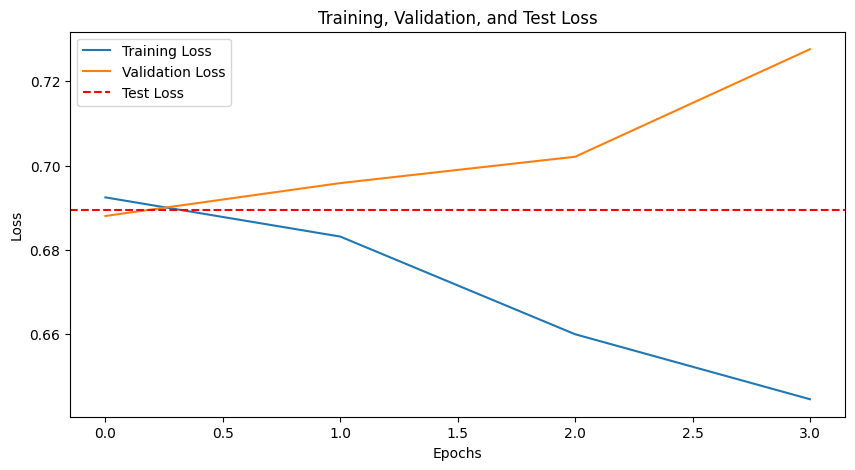

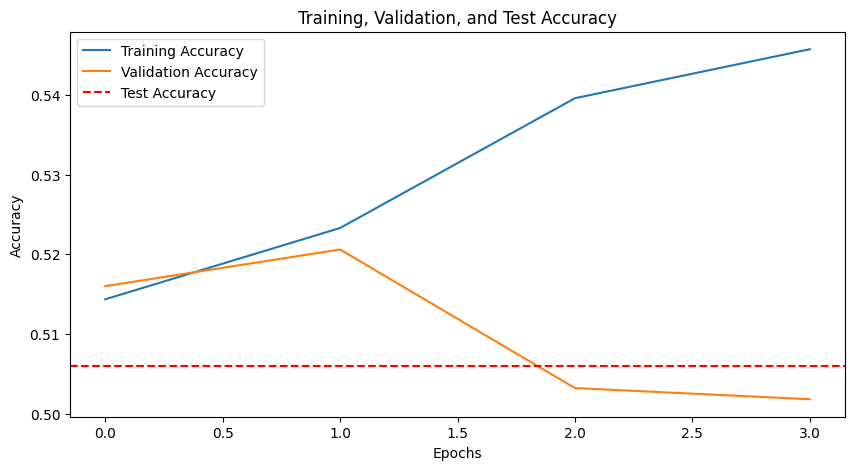

In [4]:
import matplotlib.pyplot as plt

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, batch_size=32)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Plotting loss for test data
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.axhline(y=test_loss, color='r', linestyle='--', label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training, Validation, and Test Loss')
plt.legend()
plt.show()

# Plotting accuracy for test data
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.axhline(y=test_accuracy, color='r', linestyle='--', label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.legend()
plt.show()


# 6. Hyperparameter Tuning

In [5]:
# Modify LSTM units
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    LSTM(units=128, return_sequences=False),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


# 7. Comparative Analysis

In [7]:
from tensorflow.keras.layers import Flatten

# Build a simple feedforward network
ff_model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

ff_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the feedforward model
ff_history = ff_model.fit(
    x_train_split, y_train_split,
    validation_data=(x_val, y_val), # Change x_val_split to x_val
    epochs=10,
    batch_size=64,
    callbacks=[early_stopping]
)

# Compare RNN and feedforward performance
ff_test_loss, ff_test_accuracy = ff_model.evaluate(x_test, y_test)
print(f"Feedforward Test Accuracy: {ff_test_accuracy:.2f}")
print(f"RNN Test Accuracy: {test_accuracy:.2f}")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 112ms/step - accuracy: 0.5929 - loss: 0.6535 - val_accuracy: 0.8676 - val_loss: 0.3172
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 33s 105ms/step - accuracy: 0.9208 - loss: 0.2080 - val_accuracy: 0.8630 - val_loss: 0.3255
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 104ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.8620 - val_loss: 0.4226
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 44s 114ms/step - accuracy: 0.9979 - loss: 0.0109 - val_accuracy: 0.8610 - val_loss: 0.5245
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8560 - loss: 0.3306
Feedforward Test Accuracy: 0.86
RNN Test Accuracy: 0.51
